# Analizing simple statistics features from Lead-1

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Adding imports

Using fastai library, more on https://www.fast.ai/

Repo to the library can be found on https://github.com/fastai/fastai

This Deep Learning library is being used mainly for some handy data processing functions like "proc_df" or "rf_feature_importance".

For more information on those run:

?proc_df

In [2]:
import sys
sys.path.append("../../tutorials/fastai/old/") # go to parent dir

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

from sklearn import metrics

### Path to previously saved data

In [3]:
PATH = "tmp/"

In [4]:
!ls {PATH}

pyhs-raw  pyhs-raw-corrected


### Loading raw statistics data

In [3]:
df_raw = pd.read_feather('tmp/pyhs-raw')
df_raw

,age,sex,fmax,mean_RR,mean_R_Peaks,mean_T_Peaks,mean_P_Peaks,mean_Q_Peaks,mean_S_Peaks,median_RR,...,var_RR,var_R_Peaks,skew_RR,skew_R_Peaks,kurt_RR,kurt_R_Peaks,mean_P_Onsets,mean_T_Offsets,HRV,label
0,64,1,8.203281,4460.777778,1.906904e+05,84.166667,77.666667,-32.750000,-46.666667,4017.0,...,8.233628e+06,3.074513e+10,0.326896,0.452789,-1.114599,-1.285166,4617.666667,5106.166667,300.261749,PAC\n
1,24,1,2.150430,9963.953488,1.612913e+05,183.904762,44.047619,-38.190476,-212.047619,9914.0,...,3.436726e+07,1.481045e+10,0.008229,-0.012282,-1.196234,-1.955239,10309.619048,10776.285714,252.051913,Normal\n
2,59,0,1.054852,7031.666667,2.289459e+05,120.466667,58.733333,-36.200000,-130.266667,6993.0,...,1.704473e+07,4.754209e+10,0.016040,0.102263,-1.178660,-1.859521,6736.266667,7255.600000,247.390310,PAC\n
3,14,1,7.645041,6695.090909,4.049139e+06,56.714286,57.190476,-148.619048,-121.952381,6660.0,...,1.752821e+07,8.191544e+11,0.031014,-4.325836,-1.220443,16.835113,6795.238095,7248.285714,319.844531,Normal\n
4,40,1,2.182612,5615.250000,1.302676e+06,196.000000,40.818182,-218.636364,-259.454545,5640.0,...,1.072786e+07,1.682837e+12,-0.014445,0.045967,-1.216803,-1.940233,5709.272727,6233.818182,237.254954,RBBB\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,61,1,2.200880,5355.391304,6.515502e+05,4.000000,4.600000,-13.800000,-558.100000,5212.0,...,8.467770e+06,5.689022e+11,-0.042738,0.273157,-1.121451,-1.911613,5066.800000,5409.800000,231.441628,AF
6873,78,1,4.201681,5052.095238,2.516323e+06,33.583333,-16.833333,-116.583333,-231.250000,4936.0,...,7.846417e+06,5.001414e+12,-0.059236,-0.246734,-0.964861,-1.885106,4722.000000,5218.000000,254.732016,AF\n
6874,12,1,1.583861,6097.157895,3.228570e+05,276.333333,30.777778,-94.222222,-266.166667,6134.0,...,1.271993e+07,5.643145e+10,-0.021902,0.088967,-1.201353,-1.860108,6067.111111,6543.000000,160.942494,Normal\n
6875,59,1,6.102441,5006.153846,7.516309e+05,-15.900000,13.333333,-36.500000,-34.700000,5632.0,...,9.243060e+06,3.005175e+11,-0.216776,-0.494394,-1.168932,-1.662923,NaN,5240.400000,413.754658,I-AVB\n


## Pre-processing
### Taking a look at the independent variable

In [4]:
labels = pd.get_dummies(df_raw['label'])
labels.describe()

,AF,AF\n,I-AVB,I-AVB\n,LBBB,LBBB\n,Normal\n,PAC,PAC\n,PVC,PVC\n,RBBB,RBBB\n,STD,STD\n,STE\n
count,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000
mean,0.035626,0.141922,0.005235,0.099753,0.002908,0.026029,0.133488,0.001600,0.077505,0.002908,0.088265,0.020649,0.222917,0.000291,0.114003,0.026901
std,0.185369,0.348996,0.072168,0.299692,0.053854,0.159232,0.340127,0.039965,0.267410,0.053854,0.283701,0.142215,0.416233,0.017052,0.317838,0.161807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Removing duplicated Labels

In [5]:
df_raw['label'][df_raw.loc[:, 'label'] == 'AF\n'] = 'AF'
df_raw['label'][df_raw.loc[:, 'label'] == 'I-AVB\n'] = 'I-AVB'
df_raw['label'][df_raw.loc[:, 'label'] == 'LBBB\n'] = 'LBBB'
df_raw['label'][df_raw.loc[:, 'label'] == 'Normal\n'] = 'Normal'
df_raw['label'][df_raw.loc[:, 'label'] == 'PAC\n'] = 'PAC'
df_raw['label'][df_raw.loc[:, 'label'] == 'PVC\n'] = 'PVC'
df_raw['label'][df_raw.loc[:, 'label'] == 'RBBB\n'] = 'RBBB'
df_raw['label'][df_raw.loc[:, 'label'] == 'STD\n'] = 'STD'
df_raw['label'][df_raw.loc[:, 'label'] == 'STE\n'] = 'STE'

/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [6]:
labels = pd.get_dummies(df_raw['label'])
labels.describe()

,AF,I-AVB,LBBB,Normal,PAC,PVC,RBBB,STD,STE
count,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000,6877.000000
mean,0.177548,0.104988,0.028937,0.133488,0.079104,0.091173,0.243566,0.114294,0.026901
std,0.382160,0.306560,0.167642,0.340127,0.269921,0.287877,0.429265,0.318191,0.161807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Saving label process

In [6]:
df_raw.to_feather('tmp/pyhs-raw-corrected')

## Reading pre-processed data and building a first model

In [8]:
df_raw = pd.read_feather('tmp/pyhs-raw-corrected')
df_raw

,age,sex,mean_RR,mean_R_Peaks,mean_T_Peaks,mean_P_Peaks,mean_Q_Peaks,mean_S_Peaks,median_RR,median_R_Peaks,...,var_RR,var_R_Peaks,skew_RR,skew_R_Peaks,kurt_RR,kurt_R_Peaks,mean_P_Onsets,mean_T_Offsets,HRV,label
0,64,1,4460.777778,1.906904e+05,84.166667,77.666667,-32.750000,-46.666667,4017.0,1.634342e+05,...,8.233628e+06,3.074513e+10,0.326896,0.452789,-1.114599,-1.285166,4617.666667,5106.166667,300.261749,PAC
1,24,1,9963.953488,1.612913e+05,183.904762,44.047619,-38.190476,-212.047619,9914.0,2.453358e+05,...,3.436726e+07,1.481045e+10,0.008229,-0.012282,-1.196234,-1.955239,10309.619048,10776.285714,252.051913,Normal
2,59,0,7031.666667,2.289459e+05,120.466667,58.733333,-36.200000,-130.266667,6993.0,1.833640e+05,...,1.704473e+07,4.754209e+10,0.016040,0.102263,-1.178660,-1.859521,6736.266667,7255.600000,247.390310,PAC
3,14,1,6695.090909,4.049139e+06,56.714286,57.190476,-148.619048,-121.952381,6660.0,4.226886e+06,...,1.752821e+07,8.191544e+11,0.031014,-4.325836,-1.220443,16.835113,6795.238095,7248.285714,319.844531,Normal
4,40,1,5615.250000,1.302676e+06,196.000000,40.818182,-218.636364,-259.454545,5640.0,1.118474e+06,...,1.072786e+07,1.682837e+12,-0.014445,0.045967,-1.216803,-1.940233,5709.272727,6233.818182,237.254954,RBBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,61,1,5355.391304,6.515502e+05,4.000000,4.600000,-13.800000,-558.100000,5212.0,1.013447e+04,...,8.467770e+06,5.689022e+11,-0.042738,0.273157,-1.121451,-1.911613,5066.800000,5409.800000,231.441628,AF
6873,78,1,5052.095238,2.516323e+06,33.583333,-16.833333,-116.583333,-231.250000,4936.0,4.021264e+06,...,7.846417e+06,5.001414e+12,-0.059236,-0.246734,-0.964861,-1.885106,4722.000000,5218.000000,254.732016,AF
6874,12,1,6097.157895,3.228570e+05,276.333333,30.777778,-94.222222,-266.166667,6134.0,2.903852e+05,...,1.271993e+07,5.643145e+10,-0.021902,0.088967,-1.201353,-1.860108,6067.111111,6543.000000,160.942494,Normal
6875,59,1,5006.153846,7.516309e+05,-15.900000,13.333333,-36.500000,-34.700000,5632.0,1.113706e+06,...,9.243060e+06,3.005175e+11,-0.216776,-0.494394,-1.168932,-1.662923,NaN,5240.400000,413.754658,I-AVB


In [7]:
df, y, nas = proc_df(df_raw, 'label')

In [10]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m.fit(df, y)

m.score(df,y), m.oob_score_

CPU times: user 1min 10s, sys: 512 ms, total: 1min 11s
Wall time: 12.4 s


(1.0, 0.5873200523484078)

## Some feature engineering

In [11]:
df_raw['PT_duration'] = df_raw['mean_T_Offsets'] - df_raw['mean_P_Onsets']

In [12]:
df, y, nas = proc_df(df_raw, 'label')

In [14]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m.fit(df, y)

m.score(df,y), m.oob_score_

CPU times: user 1min 23s, sys: 399 ms, total: 1min 23s
Wall time: 14 s


(1.0, 0.6116038970481315)

### Removing some columns

In [15]:
df_e = df_raw.drop(['mean_T_Offsets', 'mean_P_Onsets'], axis=1)

In [16]:
df, y, nas = proc_df(df_e, 'label')

In [18]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m.fit(df, y)

m.score(df,y), m.oob_score_

CPU times: user 31.9 s, sys: 200 ms, total: 32.1 s
Wall time: 6.14 s


(1.0, 0.612621782754108)

## Normalizing of Features

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## We run the model again with our normalized features

In [22]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m.fit(df_scaled, y)

m.score(df_scaled,y), m.oob_score_

CPU times: user 31.5 s, sys: 157 ms, total: 31.7 s
Wall time: 5.96 s


(1.0, 0.6111676603169987)

## Taking a look at Feature Importance

In [23]:
fi = rf_feat_importance(m, df)

In [24]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

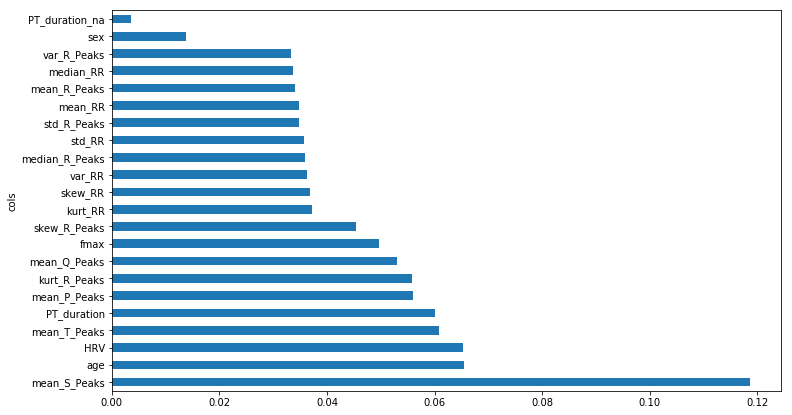

In [25]:
plot_fi(fi[:25]);

## Split between Train and Validation Datasets

In [39]:
def random_split(df, valid_size):
    np.random.seed(41)
    idxs_valid = np.random.permutation(len(df))[:valid_size]
    train = set(range(len(df)))
    valid = set(idxs_valid)
    idxs_train = list(train ^ valid)
    return df.iloc[idxs_valid].copy(), df.iloc[idxs_train].copy()

In [40]:
df_valid, df_train = random_split(df_e, 2000) # One third

In [41]:
pd.get_dummies(df_train['label']).describe()

,AF,I-AVB,LBBB,Normal,PAC,PVC,RBBB,STD,STE
count,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000
mean,0.176133,0.100472,0.028706,0.138610,0.082223,0.087349,0.244823,0.112774,0.028911
std,0.380972,0.300659,0.166997,0.345574,0.274732,0.282374,0.430026,0.316349,0.167574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train, y_train, nas = proc_df(df_train, 'label')
X_valid, y_valid, nas = proc_df(df_valid, 'label', na_dict=nas)

In [43]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m.fit(X_train, y_train)

m.score(X_train,y_train), m.score(X_valid, y_valid), m.oob_score_

CPU times: user 21.9 s, sys: 261 ms, total: 22.1 s
Wall time: 4.57 s


(1.0, 0.586, 0.5981135944228009)